<a href="https://www.kaggle.com/code/natsu18/pgs-s4e2-lgboost-and-adversarial-validation?scriptVersionId=162242275" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <div style="border: 2px solid #BBA0CA; padding: 20px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">
        <h1 style="color: #583B68; font-size: 32px; text-transform: uppercase; letter-spacing: 2px; margin-bottom: 20px;">EDA & modelling using LGBM Classifier</h1>
        <div style="color: #583B68"><em>
       If you like the content please consider an upvote. It is a great motivator to keep sharing code and ideas.
        Thank you!!!
    </em></div>
</div>

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">Introduction</h1>
    </div></div>

<p>This notebook is created for Multiclass Classification with a Obesity Risk data in the Playground Season-4 Episode-2.
        </p>
        <p>This notebook attempts to perform Exploratory Data Analysis on the Obesity Risk Dataset and eventually train a model on it and enhance the predictions by fine-tuning the model.
        </p>
        <blockquote>  If you find this notebook helpful please consider upvoting <br>
    and follow me on twitter <a href="https://twitter.com/yoii186"><b>@yoii186</b></a></blockquote> 
    </div>
</div>

## Contents:
<hr>

1. [Libraries](#Libraries)
2. [Data](#data)
3. [Target Feature](#target)
4. [Exploratory Data Analysis](#eda)
5. [Optimizer](#opt)
6. [Model Training](#model)
7. [Feature Importance](#feature)
8. [Submission](#sub)

### Important Libraries used in the project:

- Numpy
- Pandas
- Matplotlib
- Seaborn
- Scikit-learn
- LighGBM
- XGBoost
- CatBoost
- Optuna
- warnings

### Models used to make predictions:

- LighGBM Classifier
- Optuna for Hyperparameter tuning

Now, let's import the data.

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">Libraries</h1>
    </div></div>


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from copy import deepcopy
from functools import partial
from itertools import combinations
import random
import gc

# Import sklearn classes for model selection, cross validation, and performance evaluation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from category_encoders import OneHotEncoder, CountEncoder, CatBoostEncoder, OrdinalEncoder
from imblearn.under_sampling import RandomUnderSampler

# Import libraries for Hypertuning
import optuna

# Import libraries for gradient boosting
import xgboost as xgb
import lightgbm as lgb
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from catboost import Pool

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
import shap

In [2]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2', '#fee08b',
           '#66c2a5', '#5e4fa2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('fivethirtyeight')

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">1. Data</h1>
    </div></div>



# 1. Data Exploration: <a name="data"></a>
The dataset for this competition (both train and test) was generated from a deep learning model trained on the [Obesity or CVD risk dataset](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data).

> Submissions are evaluated using the accuracy score.

## 1.1 Data Description:

Here is a quick description of the data which was taken from the original data.

### Features:
- FAVC: Frequent consumption of high caloric food,
- FCVC: Frequency of consumption of vegetables,
- NCP: Number of main meals,
- CAEC: Consumption of food between meals,
- CH20: Consumption of water daily,
- CALC: Consumption of alcohol.
- SCC: Calories consumption monitoring,
- FAF: Physical activity frequency,
- TUE: Time using technology devices,
- MTRANS: Transportation used.
- Gender,
- Age,
- Height and
- Weight.

> In Original data 'TUE', 'FAF', 'CH2O', 'NCP', 'FCVC' columns are categorical with 2 or 3 classes but in the competition data they are numerical so you can keep them as it is or round them to nearest integers to turn them into categorical varibles.

### Targets:
- Underweight: Less than 18.5
- Normal: 18.5 to 24.9
- Overweight: 25.0 to 29.9
- Obesity I: 30.0 to 34.9
- Obesity II: 35.0 to 39.9
- Obesity III: Higher than 40


## 1.2 Import Datasets
Here we import our train-test data and the original data as well. 
<br>
I have also changed the index of original dataset just in case we find it suitable to include in our training dataset.
<br> I have also set a target_col variable which we can use. 

In [3]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv', index_col=[0])
test_data = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv', index_col=[0])
original_data = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')

#train_data['is_generated'] = 1
#test_data['is_generated'] = 1
#original_data['is_generated'] = 0

original_data = original_data.reset_index()
original_data['id'] = original_data['index'] + test_data.index[-1] + 1
original_data = original_data.drop(columns = ['index']).set_index('id')

target = 'NObeyesdad'

In [4]:
train_data.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight


## 1.3 Stats
Here we look at the stats of our datasets. Precisely we are looking at the following:
- Basic stats
- Null values
- Duplicate values
- Unique values

In [5]:
def stats(df):
  desc = df.describe().T.style.background_gradient()
  display(desc)
  #return desc

In [6]:
stats(train_data)

,count,mean,std,min,25%,50%,75%,max
Age,20758.000000,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Height,20758.000000,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Weight,20758.000000,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
FCVC,20758.000000,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
NCP,20758.000000,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.000000,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
FAF,20758.000000,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
TUE,20758.000000,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000


In [7]:
stats_test = stats(test_data)

,count,mean,std,min,25%,50%,75%,max
Age,13840.000000,23.952740,5.799814,14.000000,20.000000,22.906342,26.000000,61.000000
Height,13840.000000,1.698934,0.088761,1.450000,1.631662,1.700000,1.760710,1.980000
Weight,13840.000000,87.384504,26.111819,39.000000,65.000000,83.952968,111.157811,165.057269
FCVC,13840.000000,2.442898,0.531606,1.000000,2.000000,2.358087,3.000000,3.000000
NCP,13840.000000,2.750610,0.710927,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,13840.000000,2.032044,0.611230,1.000000,1.771781,2.000000,2.552388,3.000000
FAF,13840.000000,0.974532,0.840361,0.000000,0.001086,1.000000,1.571865,3.000000
TUE,13840.000000,0.611033,0.608005,0.000000,0.000000,0.552498,1.000000,2.000000


In [8]:
stats_original = stats(original_data)

,count,mean,std,min,25%,50%,75%,max
Age,2111.000000,24.312600,6.345968,14.000000,19.947192,22.777890,26.000000,61.000000
Height,2111.000000,1.701677,0.093305,1.450000,1.630000,1.700499,1.768464,1.980000
Weight,2111.000000,86.586058,26.191172,39.000000,65.473343,83.000000,107.430682,173.000000
FCVC,2111.000000,2.419043,0.533927,1.000000,2.000000,2.385502,3.000000,3.000000
NCP,2111.000000,2.685628,0.778039,1.000000,2.658738,3.000000,3.000000,4.000000
CH2O,2111.000000,2.008011,0.612953,1.000000,1.584812,2.000000,2.477420,3.000000
FAF,2111.000000,1.010298,0.850592,0.000000,0.124505,1.000000,1.666678,3.000000
TUE,2111.000000,0.657866,0.608927,0.000000,0.000000,0.625350,1.000000,2.000000


In [9]:
def unique_vals(df, title=None):
  columns = train_data.columns[0:-1]
  for cols in columns:
    print(f"{title} values in {cols} is: ", df[cols].nunique())

def null_vals(df, title=None):
  columns = train_data.columns[0:-1]
  for cols in columns:
    print(f"{title} values in {cols} is: ", df[cols].isnull().sum())

In [10]:
unique_vals(train_data, "unique")

unique values in Gender is:  2
unique values in Age is:  1703
unique values in Height is:  1833
unique values in Weight is:  1979
unique values in family_history_with_overweight is:  2
unique values in FAVC is:  2
unique values in FCVC is:  934
unique values in NCP is:  689
unique values in CAEC is:  4
unique values in SMOKE is:  2
unique values in CH2O is:  1506
unique values in SCC is:  2
unique values in FAF is:  1360
unique values in TUE is:  1297
unique values in CALC is:  3
unique values in MTRANS is:  5


In [11]:
unique_vals(original_data, "unique")

unique values in Gender is:  2
unique values in Age is:  1402
unique values in Height is:  1574
unique values in Weight is:  1525
unique values in family_history_with_overweight is:  2
unique values in FAVC is:  2
unique values in FCVC is:  810
unique values in NCP is:  635
unique values in CAEC is:  4
unique values in SMOKE is:  2
unique values in CH2O is:  1268
unique values in SCC is:  2
unique values in FAF is:  1190
unique values in TUE is:  1129
unique values in CALC is:  4
unique values in MTRANS is:  5


In [12]:
null_vals(train_data, "null")

null values in Gender is:  0
null values in Age is:  0
null values in Height is:  0
null values in Weight is:  0
null values in family_history_with_overweight is:  0
null values in FAVC is:  0
null values in FCVC is:  0
null values in NCP is:  0
null values in CAEC is:  0
null values in SMOKE is:  0
null values in CH2O is:  0
null values in SCC is:  0
null values in FAF is:  0
null values in TUE is:  0
null values in CALC is:  0
null values in MTRANS is:  0


In [13]:
null_vals(original_data, "null")

null values in Gender is:  0
null values in Age is:  0
null values in Height is:  0
null values in Weight is:  0
null values in family_history_with_overweight is:  0
null values in FAVC is:  0
null values in FCVC is:  0
null values in NCP is:  0
null values in CAEC is:  0
null values in SMOKE is:  0
null values in CH2O is:  0
null values in SCC is:  0
null values in FAF is:  0
null values in TUE is:  0
null values in CALC is:  0
null values in MTRANS is:  0


In [14]:
print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)
print("Original Data Shape: ", original_data.shape)

Train Data Shape:  (20758, 17)
Test Data Shape:  (13840, 16)
Original Data Shape:  (2111, 17)


## 1.4 Analysis
<b>Important points to look at from above stats:</b>
<br>
1. On the surface, there are no null values in our dataset
2. But, We see that `FAF` and `TUE` have values 0 which is not possible (in my opinion) so we must treat them as null values and impute them with mean values, since both these features are continuous features.

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">2. Data Encoding and Feature Engineering</h1>
    </div></div>
<br>

# 2. Data Encoding and Feature Engineering
In this section we will do the following:

- Impute values in `FAF` and `TUE` <br>
- Encode the dataset:
     - We will do `OneHotEncoding` on all categorical features except our `target`
     - On `target` we will do Label Encoding
<br>
- We will then do Adversarial Validation to see if our Train-Test data is iid or not


In [15]:
train_data.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.00000,yes,yes,2.0,3.000000,Frequently,no,2.000000,no,1.0,1.000000,no,Automobile,Normal_Weight


## 2.1 Impute FAF and TUE

I think that FAF and TUE should not be 0 valued so I will impute all those values with the mean values and see if it helps us at all

In [16]:
#train_data = train_data.copy(deep=True)
train_data[['FAF','TUE']] = train_data[['FAF','TUE']].replace(0,np.nan)

null_vals(train_data, 'null')

null values in Gender is:  0
null values in Age is:  0
null values in Height is:  0
null values in Weight is:  0
null values in family_history_with_overweight is:  0
null values in FAVC is:  0
null values in FCVC is:  0
null values in NCP is:  0
null values in CAEC is:  0
null values in SMOKE is:  0
null values in CH2O is:  0
null values in SCC is:  0
null values in FAF is:  5044
null values in TUE is:  6566
null values in CALC is:  0
null values in MTRANS is:  0


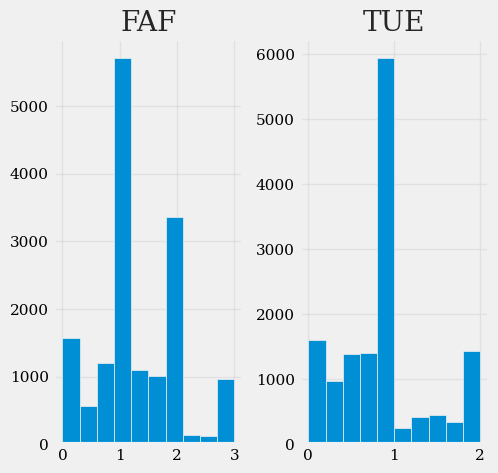

In [17]:
plot = train_data[['FAF', 'TUE']].hist(figsize=(5,5))

In [18]:
train_data['FAF'] = train_data['FAF'].fillna(train_data['FAF'].mean())
train_data['TUE'] = train_data['TUE'].fillna(train_data['TUE'].mean())

null_vals(train_data, 'null')

null values in Gender is:  0
null values in Age is:  0
null values in Height is:  0
null values in Weight is:  0
null values in family_history_with_overweight is:  0
null values in FAVC is:  0
null values in FCVC is:  0
null values in NCP is:  0
null values in CAEC is:  0
null values in SMOKE is:  0
null values in CH2O is:  0
null values in SCC is:  0
null values in FAF is:  0
null values in TUE is:  0
null values in CALC is:  0
null values in MTRANS is:  0


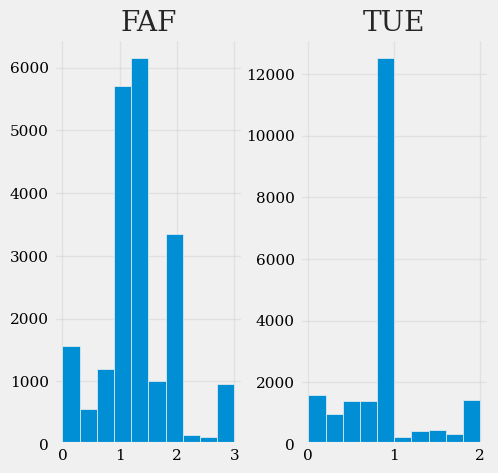

In [19]:
plot = train_data[['FAF', 'TUE']].hist(figsize=(5,5))

In [20]:
def encoding(data):    
    data['Gender']= data['Gender'].map({'Male': 0, 'Female': 1})
    data['family_history_with_overweight'] = data['family_history_with_overweight'].map({'yes': 1, 'no': 0})
    data['FAVC'] = data['FAVC'].map({'yes': 1, 'no': 0})
    data['CAEC'] = data['CAEC'].map ({'Sometimes': 0.25, 'Frequently': 0.75, 'Always': 1, 'no': 0})
    data['SMOKE'] = data['SMOKE'].map ({'yes': 1, 'no': 0}) 
    data ['SCC'] = data['SCC'].map({'yes': 1, 'no': 0})
    data ['CALC'] = data['CALC'].map ({'Sometimes' : 0.5, 'no': 0, 'Frequently': 1})
    
    ce_ohe = OneHotEncoder(cols=['MTRANS'])
    data_trans = ce_ohe.fit_transform(data['MTRANS'])
    #test_trans = ce_ohe.fit_transform(test_encoded['MTRANS'])
    #original_encoded = ce_ohe.fit_transform(original_data, original_data[target])
    
    df_data = pd.concat([data, data_trans], axis=1)
    return df_data


In [21]:
train_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,1.296875,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [22]:
df_train = encoding(train_data)
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS,NObeyesdad,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5
id,,,,,,,,,,,,,,,,,,,,,
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0.25,0,...,1.296875,0.976473,0.5,Public_Transportation,Overweight_Level_II,1,0,0,0,0
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0.75,0,...,1.000000,1.000000,0.0,Automobile,Normal_Weight,0,1,0,0,0
2,1,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0.25,0,...,0.866045,1.673584,0.0,Public_Transportation,Insufficient_Weight,1,0,0,0,0
3,1,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0.25,0,...,1.467863,0.780199,0.5,Public_Transportation,Obesity_Type_III,1,0,0,0,0
4,0,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0.25,0,...,1.967973,0.931721,0.5,Public_Transportation,Overweight_Level_II,1,0,0,0,0


In [23]:
df_test = encoding(test_data)
df_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5
id,,,,,,,,,,,,,,,,,,,,,
20758,0,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,0.25,0,...,0,0.855400,0.000000,0.5,Public_Transportation,1,0,0,0,0
20759,1,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,0.25,0,...,0,1.000000,0.000000,0.5,Public_Transportation,1,0,0,0,0
20760,1,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,0.25,0,...,0,0.000000,0.250502,0.5,Public_Transportation,1,0,0,0,0
20761,0,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,0.25,0,...,0,0.094851,0.000000,0.5,Public_Transportation,1,0,0,0,0
20762,1,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,0.25,0,...,0,0.000000,0.741069,0.5,Public_Transportation,1,0,0,0,0


In [24]:
ce_le = LabelEncoder()
df_train[target] = ce_le.fit_transform(df_train[target])
#test_encoded_data = ce_oe.fit_transform(train_encoded, train_encoded[target])
#original_encoded[target] = ce_le.fit_transform(original_encoded[target])
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS,NObeyesdad,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5
id,,,,,,,,,,,,,,,,,,,,,
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0.25,0,...,1.296875,0.976473,0.5,Public_Transportation,6,1,0,0,0,0
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0.75,0,...,1.000000,1.000000,0.0,Automobile,1,0,1,0,0,0
2,1,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0.25,0,...,0.866045,1.673584,0.0,Public_Transportation,0,1,0,0,0,0
3,1,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0.25,0,...,1.467863,0.780199,0.5,Public_Transportation,4,1,0,0,0,0
4,0,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0.25,0,...,1.967973,0.931721,0.5,Public_Transportation,6,1,0,0,0,0


In [25]:
def feature_engineering(data):
    # BMI
    data['BMI'] = data['Weight'] / (data['Height'] ** 2)

    #Partition good/bad food
    data['Food_health'] = data['FAVC']/data['FCVC']
    
    #Number of meal 
    data['Meal'] = data['NCP'] + data['CAEC']

    # Activity
    data['Activity'] = data['FAF'] * data['TUE']

    # Age group
    data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 30, 45, float('inf')],
                               labels=[0, 1, 2, 3])
    data['Age_Group'] = data['Age_Group'].astype(int)
    return data

In [26]:
train_encoded = feature_engineering(df_train)
train_encoded.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5,BMI,Food_health,Meal,Activity,Age_Group
id,,,,,,,,,,,,,,,,,,,,,
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0.25,0,...,1,0,0,0,0,28.259565,0.500000,3.233297,1.266363,1
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0.75,0,...,0,1,0,0,0,23.422091,0.500000,3.750000,1.000000,0
2,1,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0.25,0,...,1,0,0,0,0,17.126706,0.531764,1.661685,1.449399,0


In [27]:
test_encoded = feature_engineering(df_test)
test_encoded.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5,BMI,Food_health,Meal,Activity,Age_Group
id,,,,,,,,,,,,,,,,,,,,,
20758,0,26.899886,1.848294,120.644178,1,1,2.938616,3.0,0.25,0,...,1,0,0,0,0,35.315411,0.340296,3.25,0.0,1
20759,1,21.000000,1.600000,66.000000,1,1,2.000000,1.0,0.25,0,...,1,0,0,0,0,25.781250,0.500000,1.25,0.0,1
20760,1,26.000000,1.643355,111.600553,1,1,3.000000,3.0,0.25,0,...,1,0,0,0,0,41.324115,0.333333,3.25,0.0,1


In [28]:
train_encoded.drop(['MTRANS'], axis=1, inplace=True)
test_encoded.drop(['MTRANS'], axis=1, inplace=True)

### Why Adversarial Validation?
We use it to see if our train and test data are actually iid or not, so a higher roc-auc score would mean that our model is able to distinguish between test and train data very easily, we don't want that.

<b> why? </b><br>
Because if train and test data is easily distinguishable, our model will not work properly, there would be space that are not present in train data but they are present in test data, so our model wouldn't generalize properly.
<br>
We want our datasets to be indistinguishable so that the model we ultimately train generalizes properly


Now, I have a function where I do adversarial validation and I remove the most important features according to this model.
<br> <b> why? </b>
<br>
Because these are the features that make our train and test data distinguishable so removing these features should make our data slightly more indistinguishable.


##### <b>NOTE: Removing a lot of features might result in accuracy of model later on </b>

In [29]:
def adversarial_validation(dataset_1 = train_encoded, dataset_2 = test_encoded, label = 'Train-Test'):

    adv_train = dataset_1.drop(target, axis = 1)
    adv_test = dataset_2.copy()

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1

    adv = pd.concat([adv_train, adv_test], ignore_index = True)

    adv_shuffled = adv.sample(frac = 1)

    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled.is_test

    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):

        adv_lr = xgb.XGBClassifier(random_state = 42)
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])

        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)

    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)

    plt.figure(figsize = (4, 4))
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'{label} Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    importance = adv_lr.feature_importances_  #(adv_shuffled, type='ShapValues')
    plt.barh(adv_X.columns.tolist(), importance)

In [30]:
#adversarial_validation()

In [31]:
#test_encoded['CALC'] = np.where(test_encoded['CALC'] == 1, 0.75, test_encoded['CALC'])
test_encoded.drop(['Activity'], axis=1, inplace=True)
train_encoded.drop(['Activity'], axis=1, inplace=True)
print(test_encoded.shape)
print(train_encoded.shape)

(13840, 24)
(20758, 25)


In [32]:
#adversarial_validation()

In [33]:
test_encoded.drop(['TUE', 'FAF'], axis=1, inplace=True)
train_encoded.drop(['TUE', 'FAF'], axis=1, inplace=True)
print(test_encoded.shape)
print(train_encoded.shape)

(13840, 22)
(20758, 23)


In [34]:
#adversarial_validation()

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">3. Exploratory Data Analysis</h1>
    </div></div>

Now we will look at our target feature and try to analyze it

## 3.1 Plot Target Feature
We will plot a pie-chart and a count plot of our target variable since it is a categorical feature with 7 classes. the 7 classes that we have are:
- Insufficient_Weight
- Normal_Weight
- Overweight_Level_I
- Overweight_Level_II
- Obesity_Type_I
- Obesity_Type_II
- Obesity_Type_III

We want to see the distribustion of each type of class, to make sure that one class doesn't dominate our training dataset


In [35]:
cat_cols = test_encoded.columns[test_encoded.nunique()<=7]
num_cols = test_encoded.columns[test_encoded.nunique()>7]
cat_cols

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS_1', 'MTRANS_2', 'MTRANS_3', 'MTRANS_4',
       'MTRANS_5', 'Age_Group'],
      dtype='object')

In [36]:
def target_var(df, title=None):
    fig, axes = plt.subplots(1,2,figsize=(9,3))
    sns.set(font_scale=0.6)
    df[target].value_counts().plot.pie(autopct='%1.1f%%',
                                    wedgeprops={'width': 0.5},
                                    startangle=0,
                                    ax=axes[0],
                                    shadow=False,
                                    textprops={'fontsize': 9},
                                    colors=palette)
    axes[0].set_ylabel('')
    sns.set(font_scale=0.6)
    sns.countplot(x=target, data=df, palette=palette)
    plt.suptitle(f"{title} - Target Variable Analysis")
    plt.tight_layout()
    plt.show()

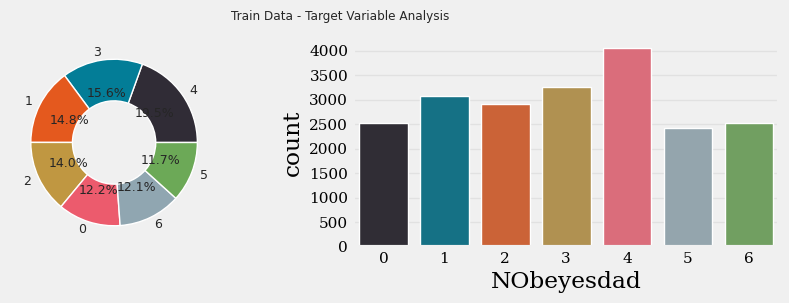

In [37]:
target_var(train_encoded, 'Train Data')

## 3.2 Analysis
We can see that classes are roughly equally split which is good for us since we won't have to deal with an imbalanced dataset

## 3.3 Counts of each categorical variable
Based on the graphs below I have the following conclusions:
- Except for feature Gender, every other feature seems to have an imbalanced input, heavily in favour of 1 choice
- This makes it difficult for us to make any assumptions

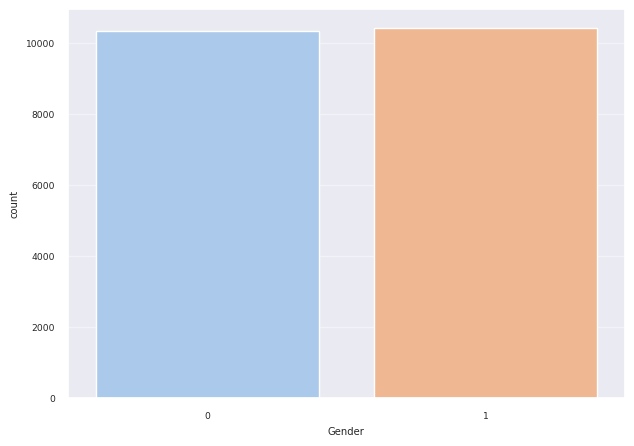

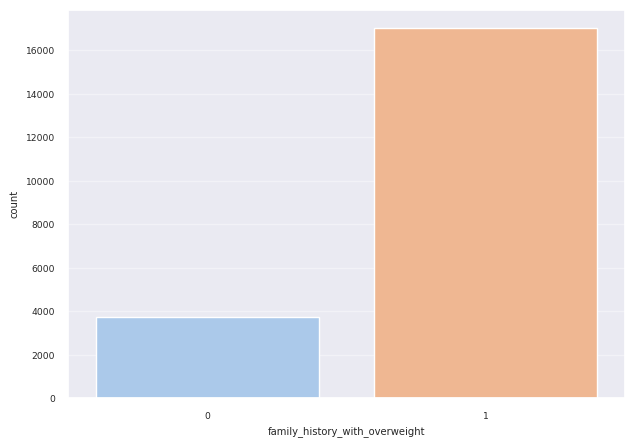

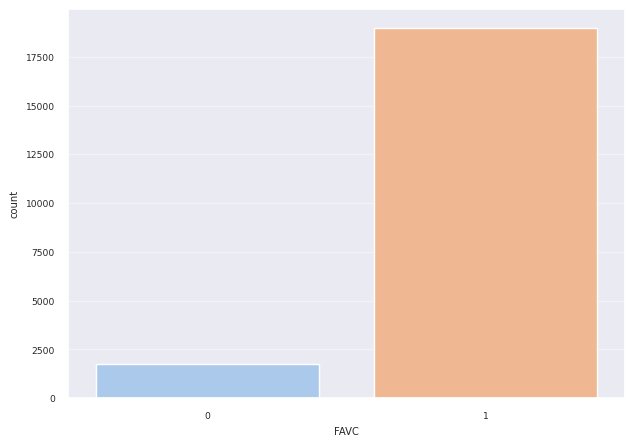

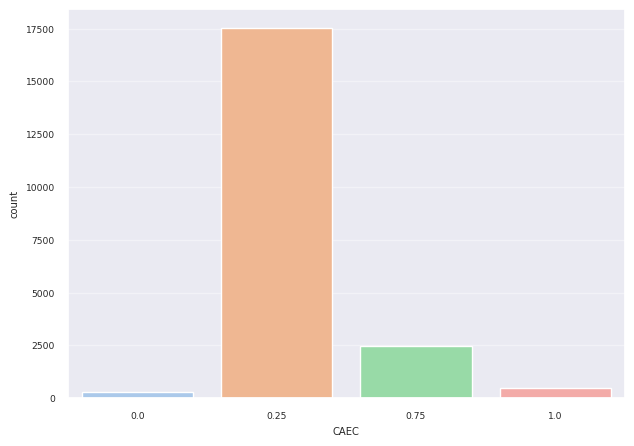

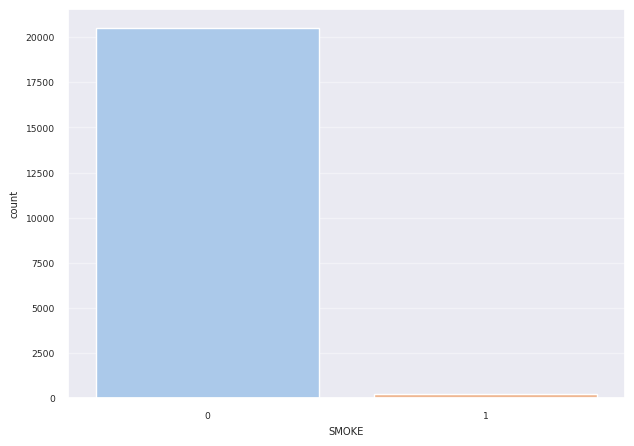

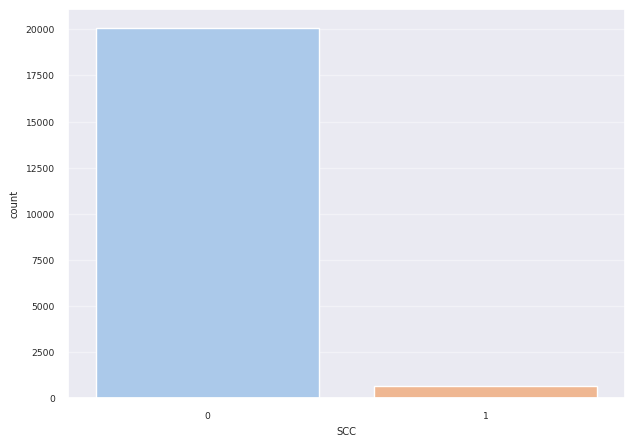

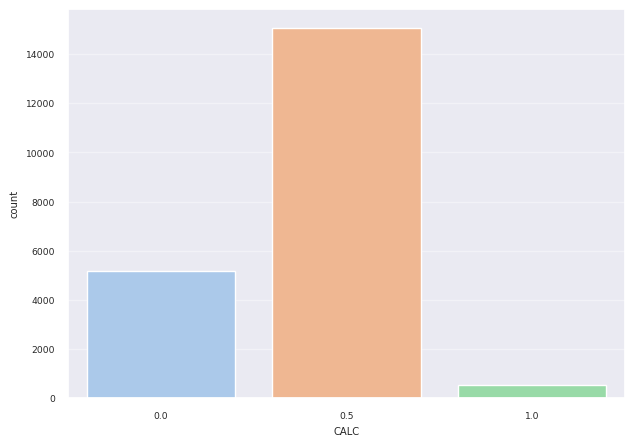

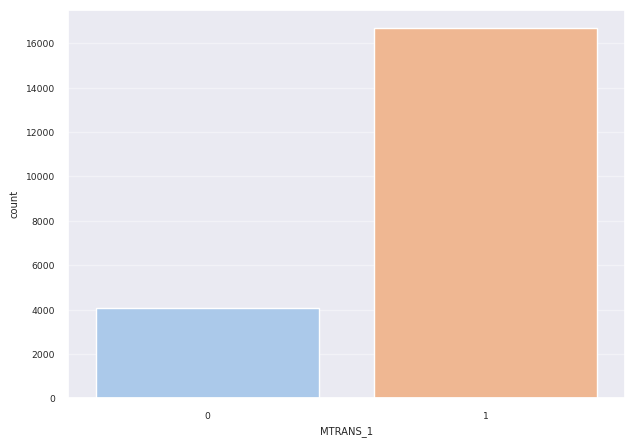

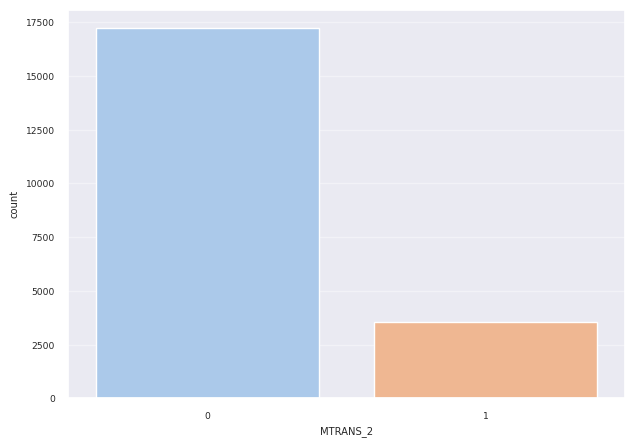

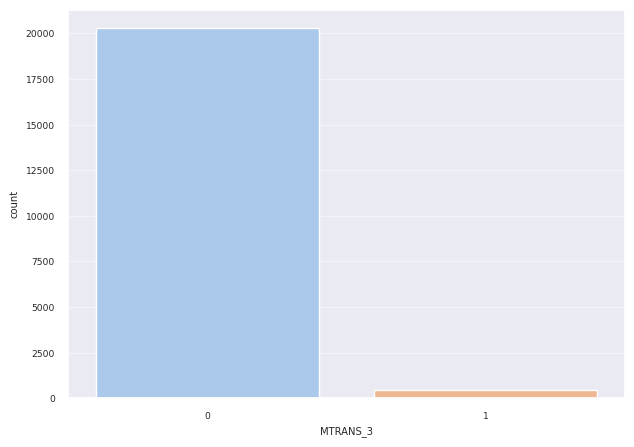

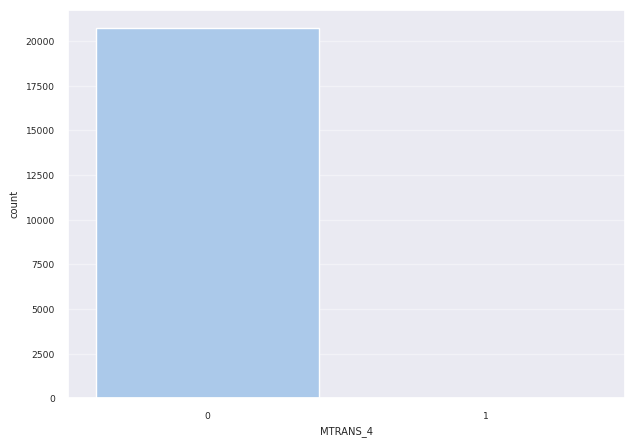

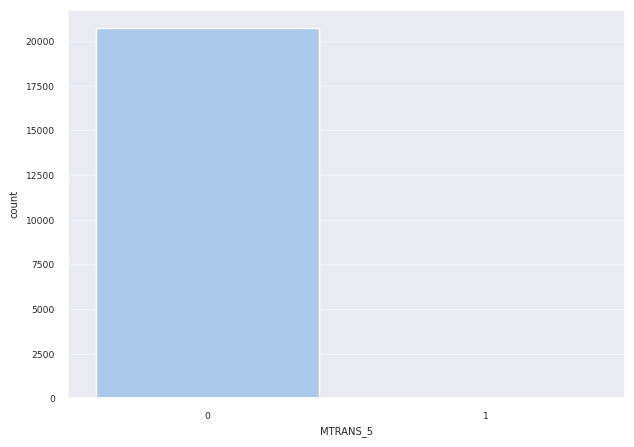

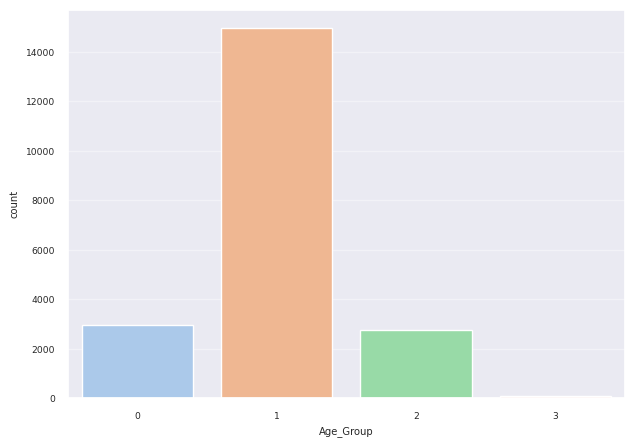

In [38]:
for col in cat_cols:
    sns.countplot(data=train_encoded, x=col, palette='pastel')
    print("\n")
    plt.show()

## 3.4 Target Variable count in all categorical features

Looking at the graphs below, it seems that Type 3 obesity affects Females more and type 2 obesity affects males more according to our data

<b> concluding anything else from graphs below is not correct because the results below could very easily be because of the imbalance in the feature choices that we saw above </b>

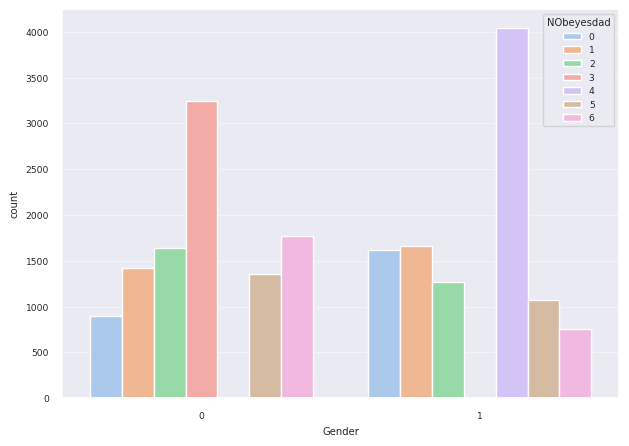

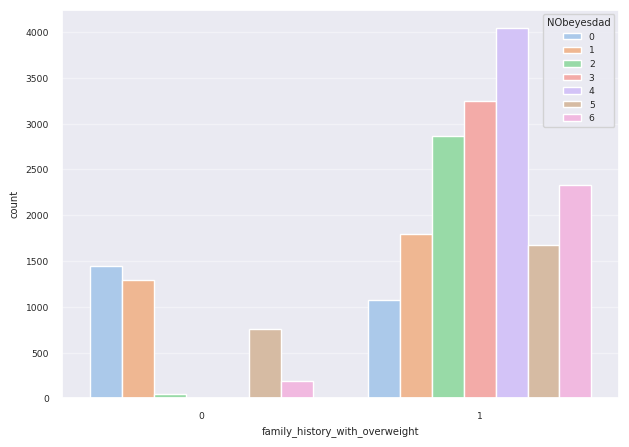

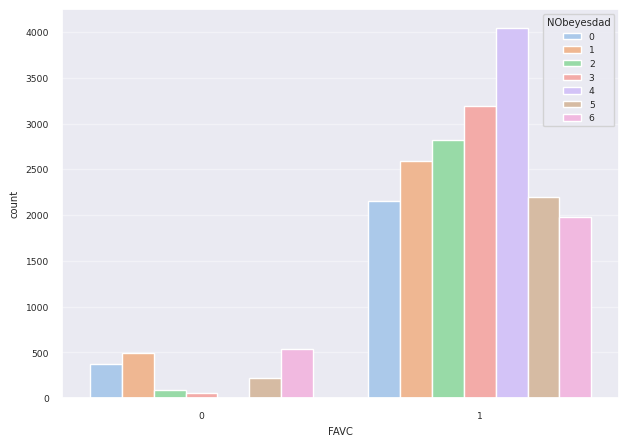

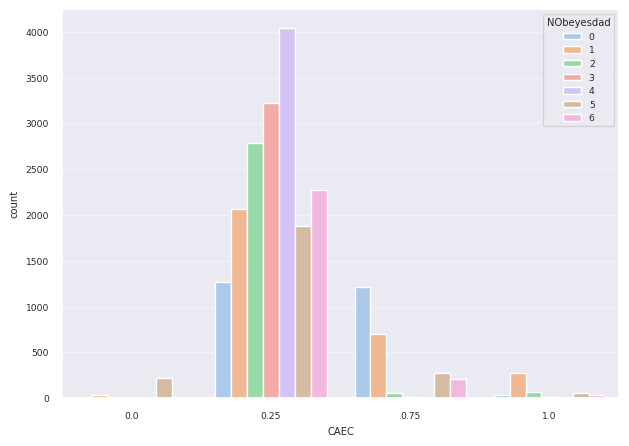

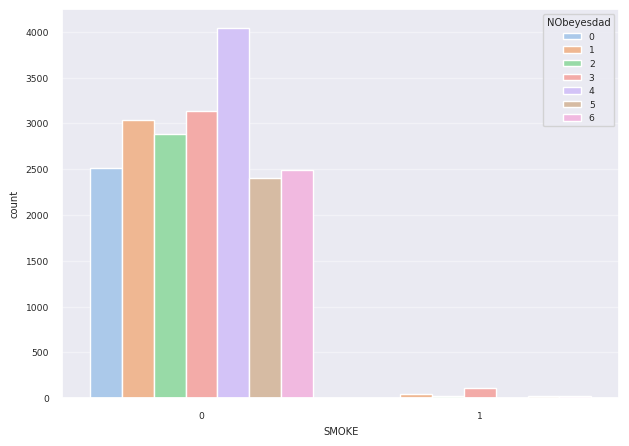

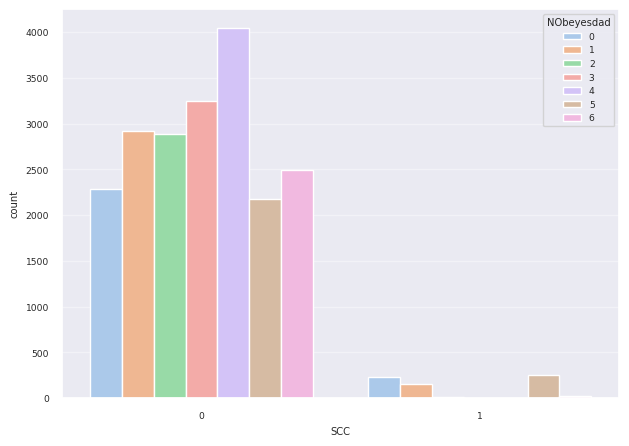

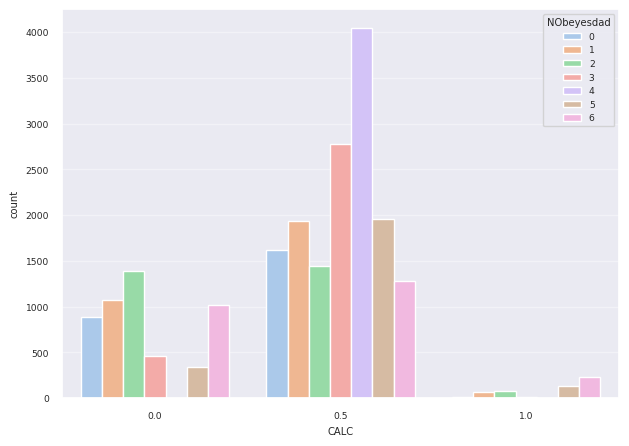

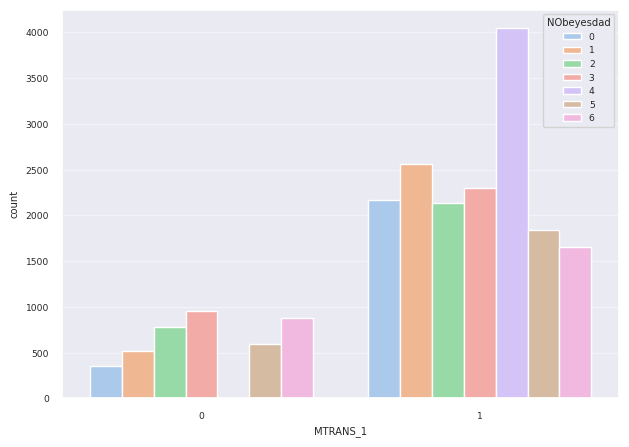

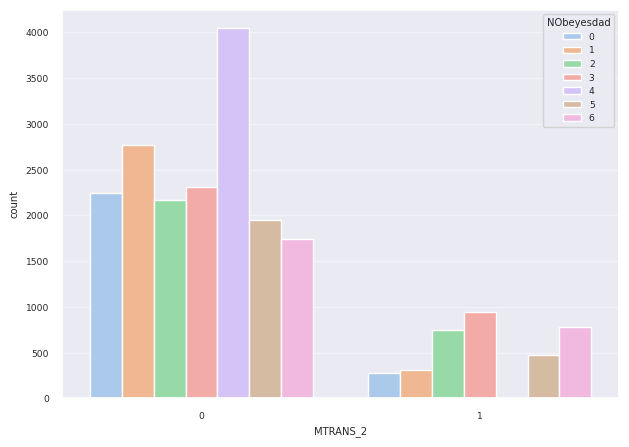

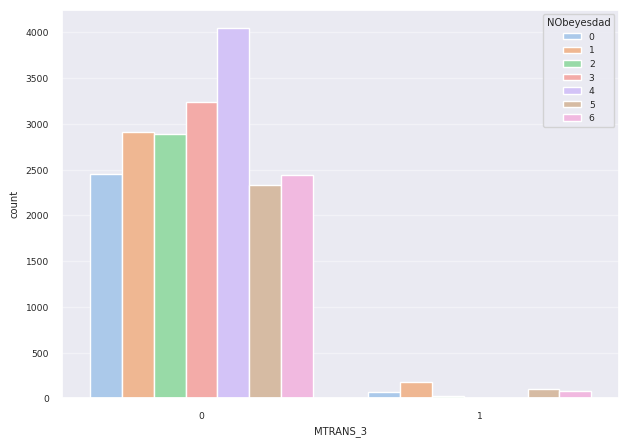

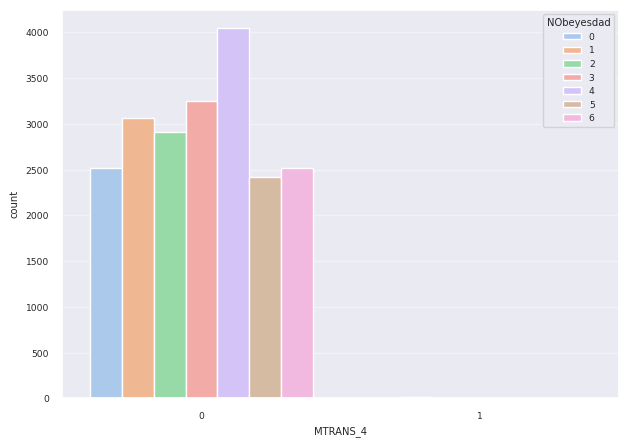

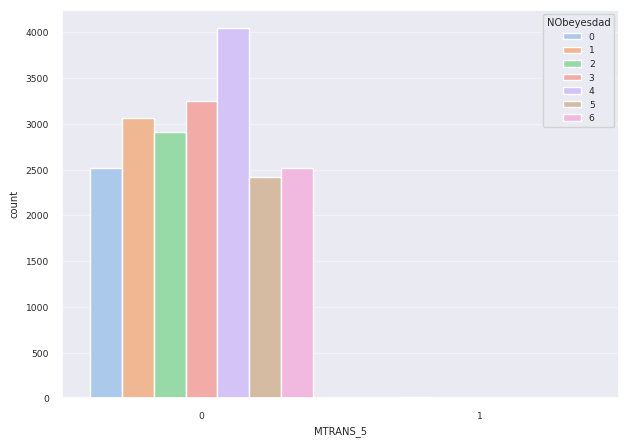

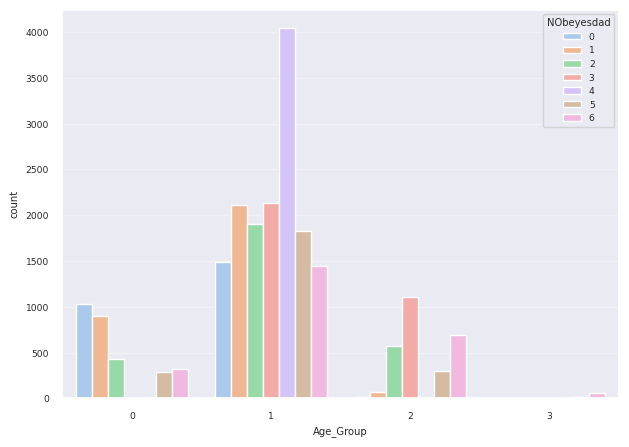

In [39]:
for col in cat_cols:
    sns.countplot(data=train_encoded, x=col, hue=target, palette='pastel')#, y=target_col)
    print("\n")
    plt.show()

## 3.5 Numerical Features

- Age seems to be skwed
- Height and weight seem to be better distribulted
- Other features are very unevenly distributed

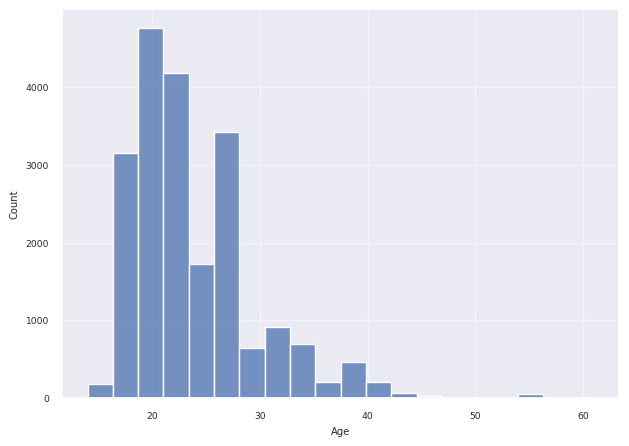

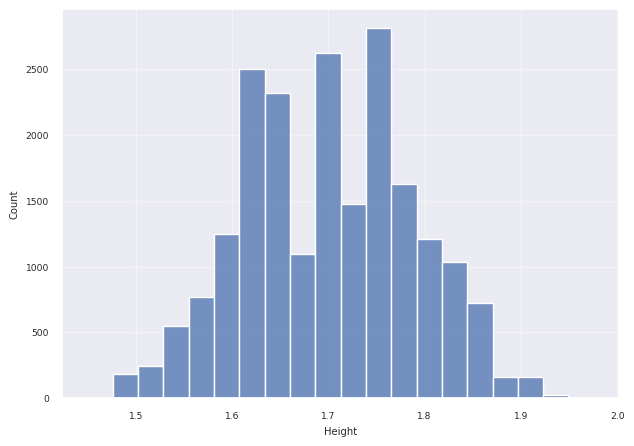

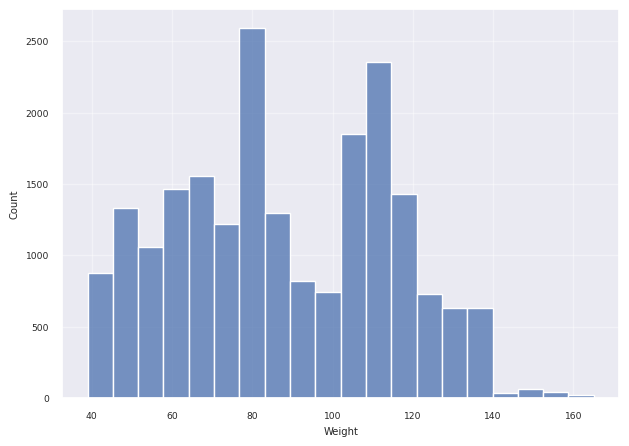

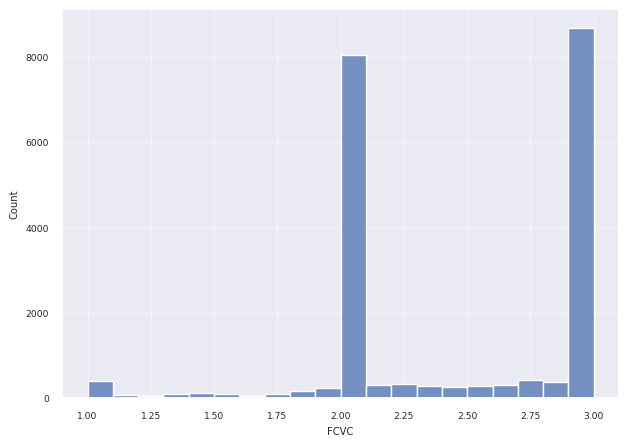

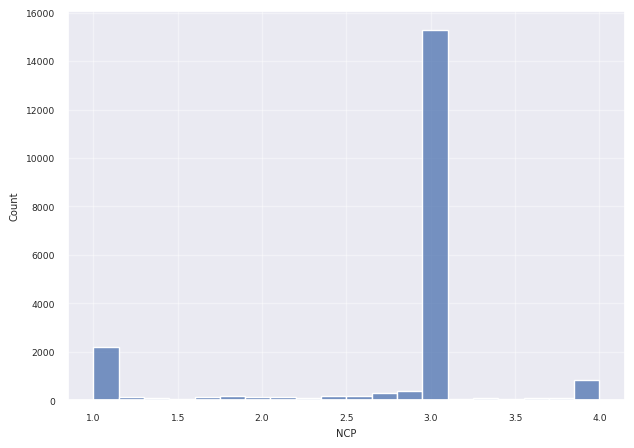

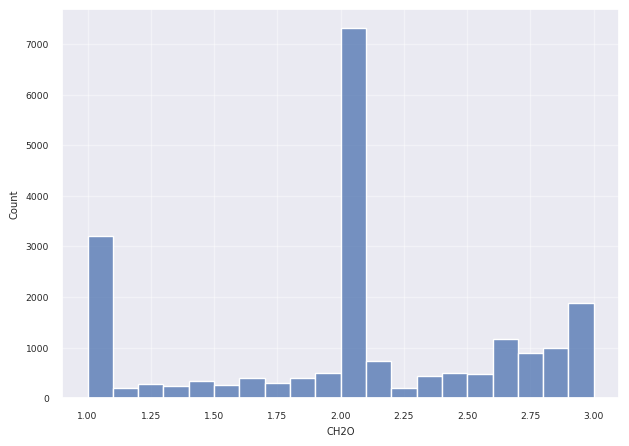

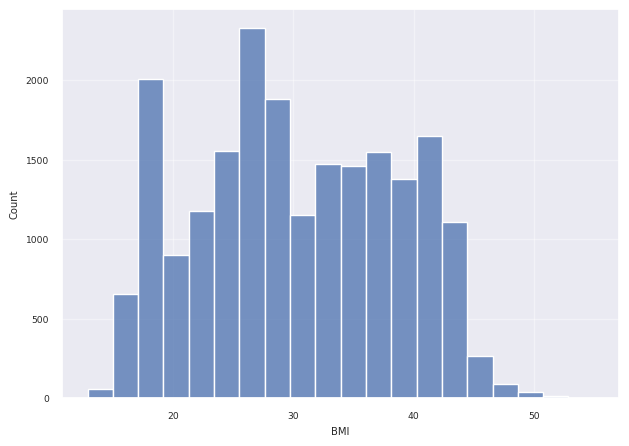

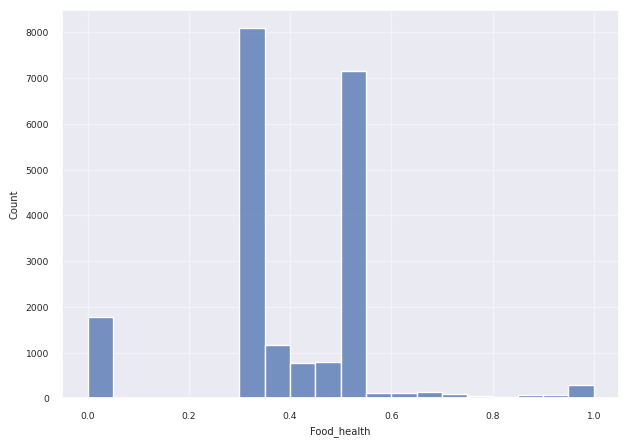

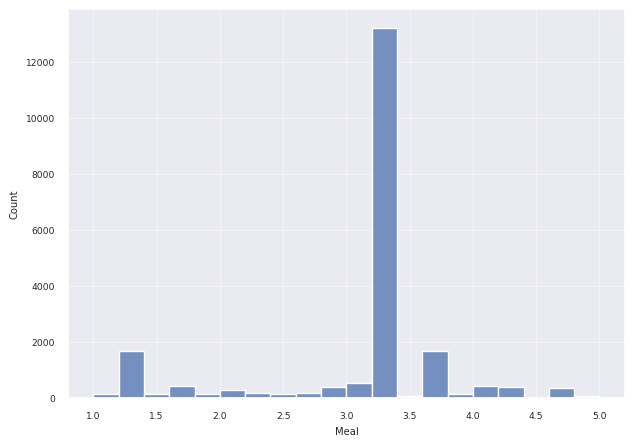

In [40]:
for cols in num_cols:
    sns.histplot(data=train_encoded, x=cols, bins=20, palette='pastel')
    print("\n")
    plt.show()

## 3.6 Target Variable vs Numerical Variables

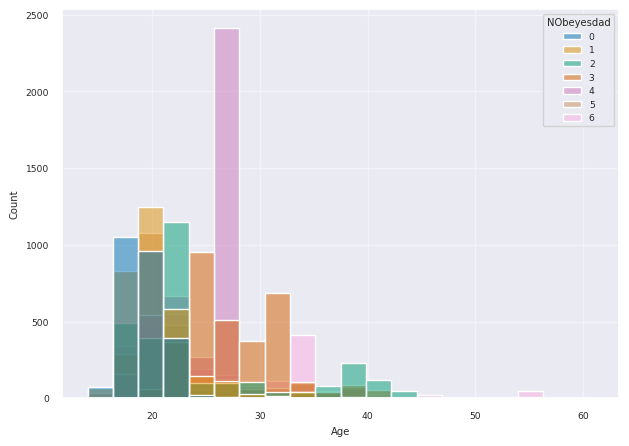

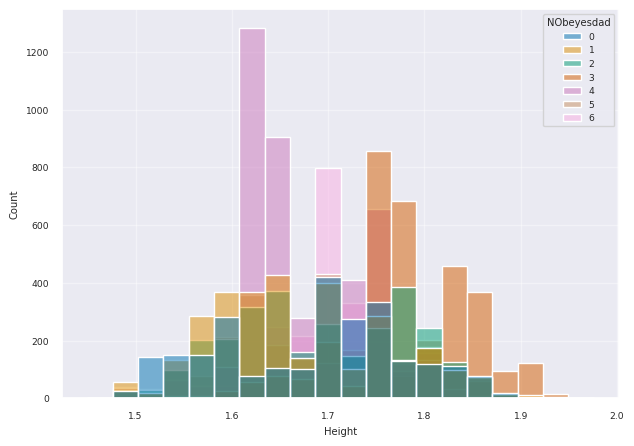

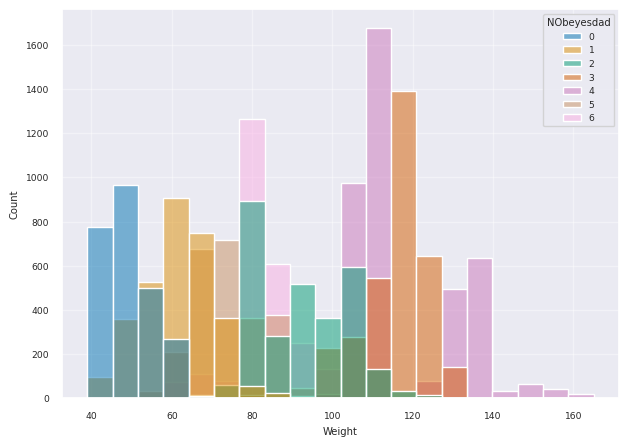

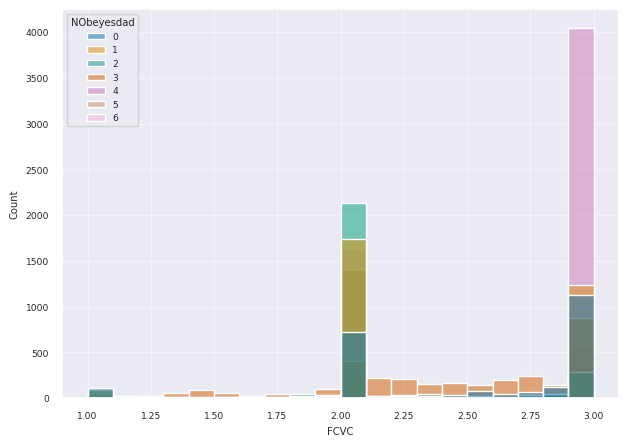

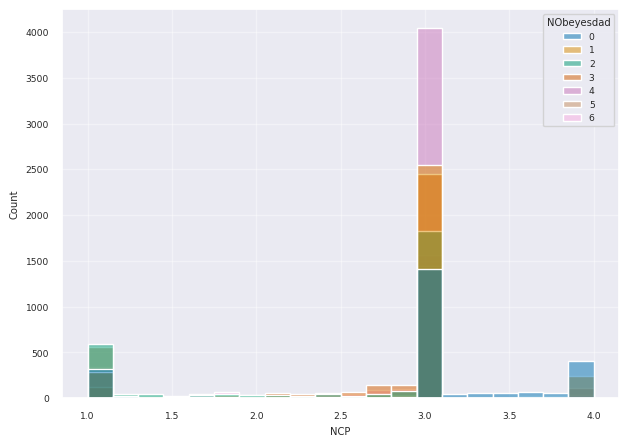

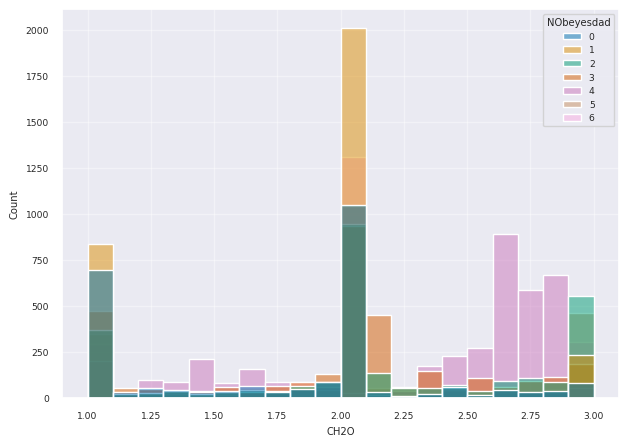

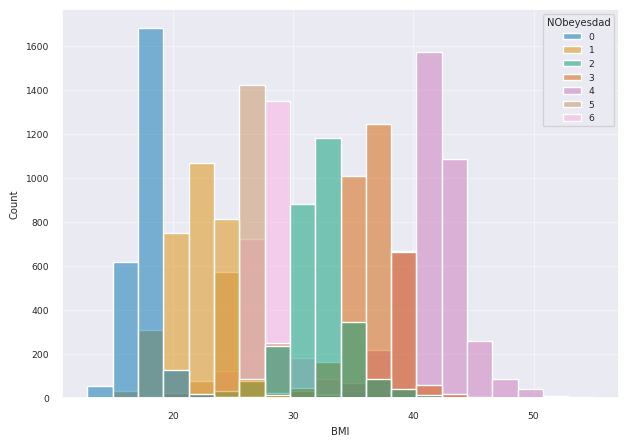

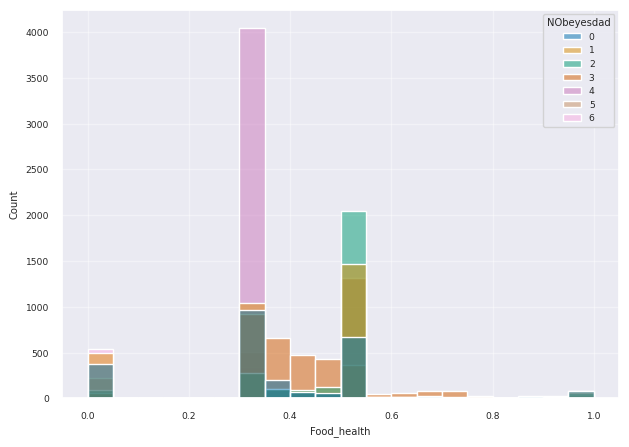

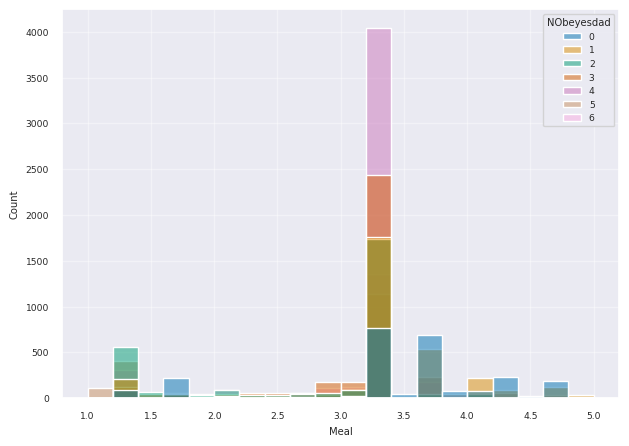

In [41]:
for cols in num_cols:
    sns.histplot(data=train_encoded, x=cols, bins=20, palette='colorblind', hue=target)
    print("\n")
    plt.show()

## 3.7 Correlation Plot

<Axes: >

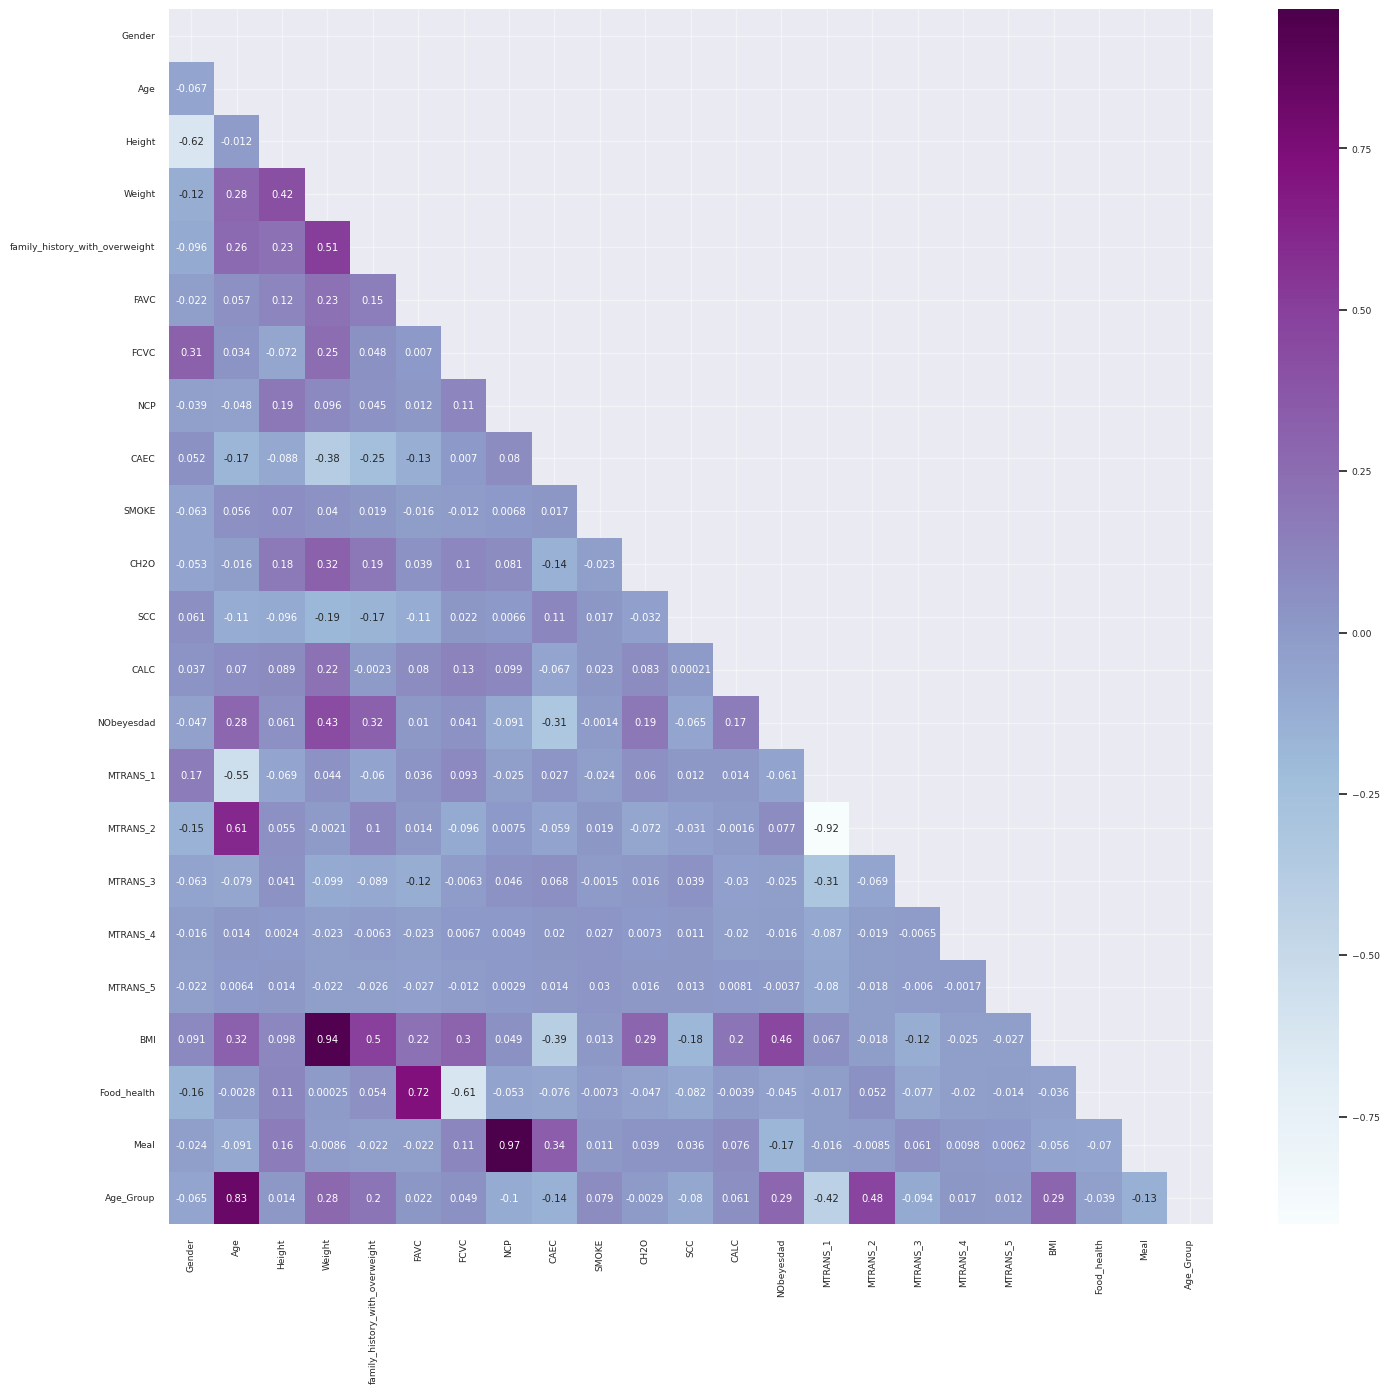

In [42]:
corr = train_encoded.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(15,15))
sns.set(font_scale=0.6)
sns.heatmap(corr, mask=mask, annot=True, cmap='BuPu')

<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">4. Data Splitting</h1>
    </div></div>


In [43]:
X = train_encoded.drop([f'{target}'],axis=1).reset_index(drop=True)
y = train_encoded[f'{target}'].reset_index(drop=True)
X_test = test_encoded.reset_index(drop=True)

In [44]:
X.drop(['Meal','Food_health', 'Age_Group'], axis=1, inplace=True)

In [45]:
X_test.drop(['Meal','Food_health', 'Age_Group'], axis=1, inplace=True)

In [46]:
cat_cols = X_test.columns[X_test.nunique()<=7]
num_cols = X_test.columns[X_test.nunique()>7]
num_cols

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'BMI'], dtype='object')

In [47]:
sc = StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

In [48]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,CALC,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5,BMI
0,0,0.105699,-0.002828,-0.235713,1,1,-0.836279,0.314684,0.25,0,1.206594,0,0.5,1,0,0,0,0,-0.237862
1,1,-1.027052,-1.606291,-1.170931,1,1,-0.836279,0.338364,0.75,0,-0.048349,0,0.0,0,1,0,0,0,-0.818331
2,1,-1.027052,0.128451,-1.430012,1,1,-1.060332,-1.913423,0.25,0,-0.195644,0,0.0,1,0,0,0,0,-1.573741
3,1,-0.507929,0.120090,1.644770,1,1,1.039171,0.338364,0.25,0,-0.584035,0,0.5,1,0,0,0,0,1.753591
4,0,1.371197,2.450367,0.224054,1,1,0.438397,-1.119801,0.25,0,-0.081469,0,0.5,1,0,0,0,0,-0.557096


In [49]:
print(f"X_train shape :{X.shape} , y_train shape :{y.shape}")
print(f"X_test shape :{X_test.shape}")

X_train shape :(20758, 19) , y_train shape :(20758,)
X_test shape :(13840, 19)


<div style="padding: 20px; background-color: #583B68; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<div style="border: 2px solid #BBA0CA; padding: 0px; text-align: center; border-radius: 10px; background-color: #FFFFFF;">  
<h1 style="background-color: #FFFFFF; color: #583B68; font-size: 30px;">5. Model Training</h1>
    </div></div>

Refer to [this](https://www.kaggle.com/code/natsu18/optuna-weights-pgs4e3) notebook for optuna hyper parameter tuning 

In [50]:
lgb_params = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_class": 7,
        "lambda_l1": 1.8513039268664582,
        "lambda_l2": 0.00019048378671961808,
        "num_leaves": 28,
        "feature_fraction": 0.5365941020519284,
        "bagging_fraction": 0.6677606419016044,
        "bagging_freq": 3,
        "min_child_samples": 53,
    }

In [51]:
strat_split = StratifiedKFold(n_splits=10,
                              random_state=8828,
                              shuffle = True)

model = lgb.LGBMClassifier(**lgb_params)
accuracy = []
for fold, (train_idx, test_idx) in enumerate(strat_split.split(X=X, y=y)):
    X_train = X.loc[train_idx]
    y_train = y.loc[train_idx]
    X_val = X.loc[test_idx]
    y_val = y.loc[test_idx]

    #model.fit(X_train, y_train,eval_set=[(X_val,y_val)], early_stopping_rounds=100)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    preds = model.predict(X_val)
    fold_accuracy = accuracy_score(y_val,preds.astype(int))
    print(fold_accuracy)
    accuracy.append(fold_accuracy)

print(f"Mean accuracy : {np.mean(accuracy)}")


0.9132947976878613
0.905587668593449
0.9060693641618497
0.9036608863198459
0.9094412331406551
0.901252408477842
0.9041425818882466
0.903179190751445
0.9002409638554217
0.9065060240963856
Mean accuracy : 0.9053375118973003


In [52]:
predictions = model.predict(X_test)

In [53]:
submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv", index_col=None)

In [54]:
submit = pd.DataFrame(predictions, columns = ['target'])
submit['id'] = submission['id']
submit = submit[['id','target']]
le_target_map = dict(zip(ce_le.transform(ce_le.classes_), ce_le.classes_))
le_target_map

{0: 'Insufficient_Weight',
 1: 'Normal_Weight',
 2: 'Obesity_Type_I',
 3: 'Obesity_Type_II',
 4: 'Obesity_Type_III',
 5: 'Overweight_Level_I',
 6: 'Overweight_Level_II'}

In [55]:
submit['NObeyesdad'] = submit['target'].apply(lambda x: le_target_map[x])
submit = submit[['id','NObeyesdad']]

In [56]:
submit

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [57]:
submit.to_csv("submission.csv", index=False)